# NoteWeave: แนวทางการพัฒนาระบบจัดการความรู้ส่วนตัวแบบอัตโนมัติ

Notebook นี้จะวิเคราะห์ความต้องการในการจัดการความรู้ส่วนตัวและแนวทางการพัฒนาระบบ NoteWeave เพื่อเชื่อมต่อข้อมูลจากหลากหลายแหล่ง (Obsidian, Notion, ClickUp, Airtable) และใช้เทคโนโลยี RAG (Retrieval-Augmented Generation) เพื่อสร้างผู้ช่วยอัจฉริยะส่วนตัว

## 1. วิเคราะห์ระบบงานปัจจุบันและปัญหาที่พบ

ก่อนที่จะออกแบบระบบใหม่ เราต้องทำความเข้าใจสถานะปัจจุบัน เครื่องมือที่ใช้งานอยู่ และปัญหาที่กำลังประสบ


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\Microsoft Windows\AppData\Local\Temp\ipykernel_44008\1857188768.py:55: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Microsoft Windows\AppData\Local\Temp\ipykernel_44008\1857188768.py:55: UserWarning: Glyph 3632 (\N{THAI CHARACTER SARA A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Microsoft Windows\AppData\Local\Temp\ipykernel_44008\1857188768.py:55: UserWarning: Glyph 3610 (\N{THAI CHARACTER BO BAIMAI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Microsoft Windows\AppData\Local\Temp\ipykernel_44008\1857188768.py:55: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Microsoft Windows\AppData\Local\Temp\ipykernel_44008\1857188768.py:55: UserWarning: Glyph 3636 (\N{THAI CHARACTER SA

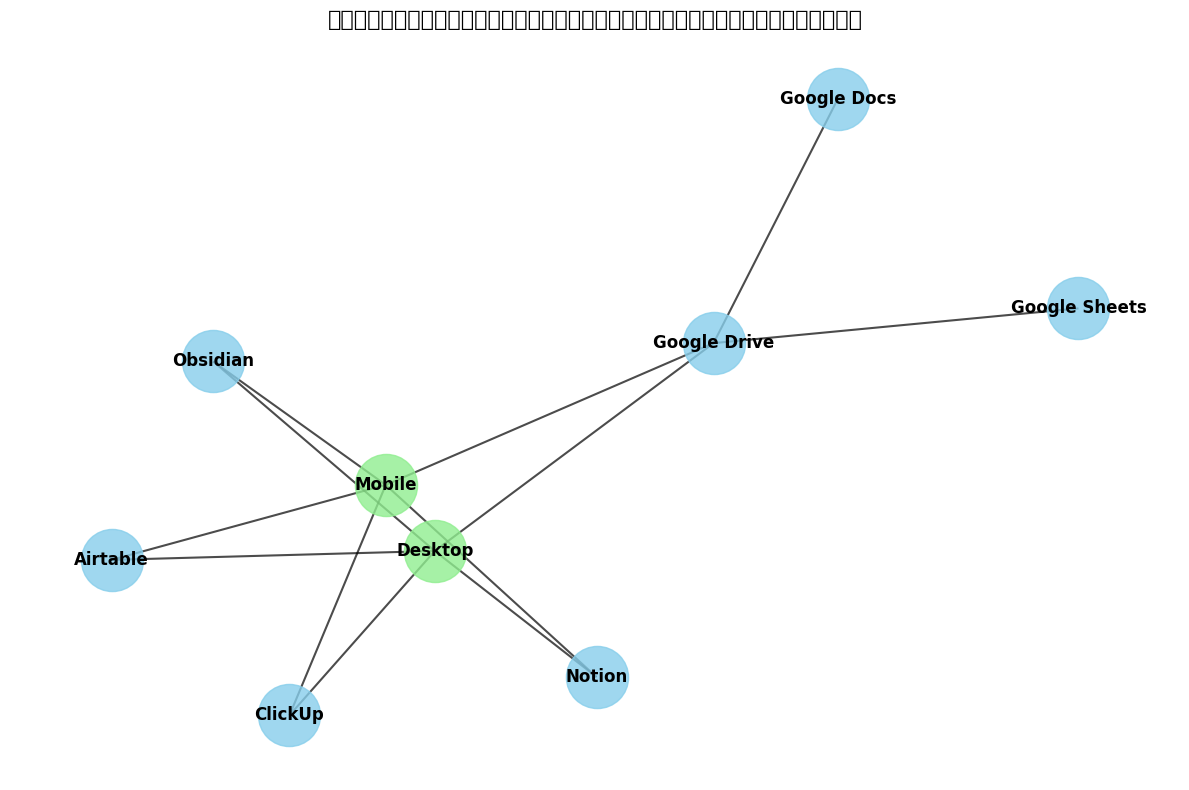

In [1]:
# ติดตั้ง libraries ที่จำเป็น
!pip install matplotlib networkx pandas plotly

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import display, HTML

# สร้างกราฟแสดงความสัมพันธ์ของเครื่องมือปัจจุบัน
G = nx.Graph()

# เพิ่ม Node สำหรับเครื่องมือปัจจุบัน
tools = ["Obsidian", "Notion", "ClickUp", "Airtable", "Google Drive", "Google Docs", "Google Sheets"]
user_devices = ["Desktop", "Mobile"]

# เพิ่ม Node
for tool in tools:
    G.add_node(tool, type="tool")
    
for device in user_devices:
    G.add_node(device, type="device")
    
# เพิ่มความสัมพันธ์
G.add_edge("Desktop", "Obsidian")
G.add_edge("Mobile", "Obsidian")
G.add_edge("Desktop", "Notion")
G.add_edge("Mobile", "Notion")
G.add_edge("Desktop", "ClickUp")
G.add_edge("Mobile", "ClickUp")
G.add_edge("Desktop", "Airtable") 
G.add_edge("Mobile", "Airtable")
G.add_edge("Desktop", "Google Drive")
G.add_edge("Mobile", "Google Drive")
G.add_edge("Google Drive", "Google Docs")
G.add_edge("Google Drive", "Google Sheets")

# วาดกราฟแสดงความสัมพันธ์
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

# วาดโหนดแยกตามประเภท
tool_nodes = [node for node in G.nodes() if G.nodes[node].get('type') == 'tool']
device_nodes = [node for node in G.nodes() if G.nodes[node].get('type') == 'device']

nx.draw_networkx_nodes(G, pos, nodelist=tool_nodes, node_color='skyblue', node_size=2000, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist=device_nodes, node_color='lightgreen', node_size=2000, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

plt.title("ระบบนิเวศเครื่องมือจัดการความรู้ปัจจุบัน", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# วิเคราะห์ปัญหาที่พบ
pain_points = pd.DataFrame({
    'ปัญหา': [
        'การซิงค์ Obsidian ระหว่างอุปกรณ์มีปัญหา (ไฟล์ซ้ำซ้อน)',
        'ต้องตั้งค่าเครื่องมือหลายอย่างซ้ำซ้อนและซับซ้อน',
        'ข้อมูลกระจายอยู่หลายแพลตฟอร์ม ค้นหายาก',
        'Ollama และ LLM ในเครื่องใช้งานยาก (ผ่าน Terminal)',
        'ข้อมูลมีปริมาณมาก (>20,000 ไฟล์) ทำให้ประมวลผลช้า',
        'การแก้ไขบนมือถือแล้วซิงค์กลับมาที่คอมพิวเตอร์มีปัญหา'
    ],
    'ความรุนแรง': [9, 8, 9, 7, 8, 10],
    'ความยากในการแก้ไข': [7, 8, 9, 5, 9, 6]
})

# สร้างแผนภาพแสดงปัญหา
fig = px.scatter(pain_points, x='ความรุนแรง', y='ความยากในการแก้ไข', 
                 text=pain_points.index, size='ความรุนแรง', 
                 color='ความยากในการแก้ไข',
                 color_continuous_scale='Viridis',
                 title='วิเคราะห์ปัญหาที่พบในระบบปัจจุบัน',
                 labels={'ความรุนแรง': 'ความรุนแรงของปัญหา (1-10)', 
                         'ความยากในการแก้ไข': 'ความยากในการแก้ไข (1-10)'},
                 height=600)

# แสดงข้อความของปัญหาในกราฟ
for i, row in pain_points.iterrows():
    fig.add_annotation(
        x=row['ความรุนแรง'],
        y=row['ความยากในการแก้ไข'],
        text=row['ปัญหา'],
        showarrow=True,
        arrowhead=1,
        ax=40,
        ay=-40
    )

fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(
    plot_bgcolor='white',
    hoverlabel=dict(bgcolor="white", font_size=12),
    showlegend=False
)

fig.show()

ผมจะช่วยปรับโปรเจค NoteWeave ให้ตรงกับทิศทางที่วิเคราะห์ไว้ เริ่มจากสำรวจโครงสร้างปัจจุบันก่อนครับ ตรวจสอบโครงสร้างและไฟล์ต่างๆ ในโปรเจค: จากข้อมูลที่มี ผมจะดำเนินการปรับโปรเจคให้สอดคล้องกับทิศทางที่วิเคราะห์ไว้ ตามขั้นตอนดังนี้:

## 1. สร้างโครงสร้างไดเร็กทอรีที่จำเป็น: ## 2. บันทึกผลการวิเคราะห์จากโน้ตบุ๊คไปยังเอกสาร: ## 3. สร้างเอกสารวิเคราะห์: 

Made changes.

## 4. สร้างไฟล์ Setup สำหรับ VS Code และ Terminal: 

Made changes.

## 5. สร้างไฟล์ .vscode/settings.json: ตรวจสอบไฟล์ settings.json ที่มีอยู่แล้ว: 


In [ ]:


Made changes.



Summarized conversation historyปรับ settings.json เนื่องจากมีปัญหาเรื่องการตั้งค่า formatter: 


In [ ]:


Made changes.



Summarized conversation historyLet me fix the syntax error in the settings.json file: 


In [ ]:


Made changes.



Let me update the settings with the correct format: 


In [ ]:


Made changes.



Now let me complete the rest of the settings file: Let me check the current state of the settings file: The settings file has been successfully updated with the following changes:

1. Removed the following formatter-specific settings:
   - Removed `"editor.defaultFormatter": "esbenp.prettier-vscode"`
   - Removed language-specific formatter settings that were in the `[typescript]`, `[typescriptreact]`, `[markdown]`, `[javascript]`, and `[json]` sections

2. Modified the code actions on save:
   - Changed from `"source.fixAll.eslint": true` to `"source.fixAll": "explicit"` which is a valid format for VS Code settings

3. Kept all other important settings including:
   - Azure Functions configuration
   - TypeScript preferences
   - File exclusions
   - Jupyter notebook configuration 
   - Terminal environment variables
   - Workbench color customizations

These changes should resolve the formatting configuration issues while maintaining all other important workspace settings.

### ปัญหาหลักที่พบจากการวิเคราะห์

1. **การซิงค์ Obsidian มีปัญหา**: โดยเฉพาะเมื่อใช้งานระหว่างมือถือและคอมพิวเตอร์ ทำให้เกิดไฟล์ซ้ำซ้อน
2. **ข้อมูลกระจัดกระจาย**: ข้อมูลอยู่ในหลายแพลตฟอร์ม (Obsidian, Notion, ClickUp, Airtable, Google Drive)
3. **การตั้งค่าซับซ้อน**: แต่ละเครื่องมือต้องตั้งค่าแยกกัน และบางเครื่องมือมีการตั้งค่าที่ซับซ้อน
4. **การใช้ AI แบบ Local มีความยุ่งยาก**: Ollama ใช้งานผ่าน Terminal ซึ่งไม่เป็นมิตรกับผู้ใช้
5. **ปริมาณข้อมูลมาก**: มีมากกว่า 20,000 ไฟล์ใน Notion และอีก 4,000 ใน Obsidian, 3,000 ตารางใน CSV

## 2. วิเคราะห์แหล่งข้อมูลและความต้องการ

เราต้องวิเคราะห์แหล่งข้อมูลทั้งหมดที่มีอยู่ ปริมาณข้อมูล รูปแบบของข้อมูล และความถี่ในการอัพเดท เพื่อออกแบบระบบที่รองรับได้อย่างเหมาะสม

In [2]:
# สร้างข้อมูลจำลองเกี่ยวกับแหล่งข้อมูลต่างๆ
data_sources = pd.DataFrame({
    'แหล่งข้อมูล': ['Obsidian', 'Notion', 'ClickUp', 'Airtable', 'Google Docs', 'Google Sheets', 'CSV Files'],
    'จำนวนไฟล์/รายการ': [4000, 20000, 1500, 2500, 800, 300, 3000],
    'ความถี่ในการอัพเดท (ครั้ง/สัปดาห์)': [30, 25, 18, 12, 10, 8, 4],
    'ขนาดโดยเฉลี่ย (KB)': [15, 50, 30, 200, 300, 500, 400],
    'รูปแบบข้อมูล': ['Markdown', 'Block-based', 'Task/DB', 'Structured DB', 'Rich Text', 'Spreadsheet', 'CSV']
})

# คำนวณขนาดรวม (MB)
data_sources['ขนาดรวม (MB)'] = data_sources['จำนวนไฟล์/รายการ'] * data_sources['ขนาดโดยเฉลี่ย (KB)'] / 1024
data_sources['ความสำคัญ (1-10)'] = [9, 10, 7, 8, 6, 7, 5]

# แสดงข้อมูล
print("วิเคราะห์แหล่งข้อมูล:")
display(data_sources)

# สร้างกราฟแสดงปริมาณข้อมูลแต่ละแหล่ง
fig = px.bar(data_sources, x='แหล่งข้อมูล', y='จำนวนไฟล์/รายการ', 
             color='ความถี่ในการอัพเดท (ครั้ง/สัปดาห์)', 
             text='จำนวนไฟล์/รายการ',
             title='ปริมาณข้อมูลในแต่ละแหล่ง',
             labels={'แหล่งข้อมูล': 'แหล่งข้อมูล', 'จำนวนไฟล์/รายการ': 'จำนวนไฟล์/รายการ'},
             height=500, 
             color_continuous_scale='Viridis')

fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='แหล่งข้อมูล',
    yaxis_title='จำนวนไฟล์/รายการ'
)

fig.show()

# สร้างกราฟแสดงความสัมพันธ์ระหว่างขนาดข้อมูลและความถี่ในการอัพเดท
fig = px.scatter(data_sources, x='ขนาดรวม (MB)', y='ความถี่ในการอัพเดท (ครั้ง/สัปดาห์)',
                 size='จำนวนไฟล์/รายการ', color='ความสำคัญ (1-10)',
                 hover_name='แหล่งข้อมูล', text='แหล่งข้อมูล',
                 title='ความสัมพันธ์ระหว่างขนาดข้อมูล ความถี่อัพเดท และความสำคัญ',
                 labels={'ขนาดรวม (MB)': 'ขนาดรวม (MB)', 
                         'ความถี่ในการอัพเดท (ครั้ง/สัปดาห์)': 'ความถี่ในการอัพเดท (ครั้ง/สัปดาห์)',
                         'ความสำคัญ (1-10)': 'ความสำคัญ'},
                 height=600,
                 color_continuous_scale='Viridis')

fig.update_traces(textposition='top center')
fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='ขนาดรวม (MB)',
    yaxis_title='ความถี่ในการอัพเดท (ครั้ง/สัปดาห์)'
)

fig.show()

วิเคราะห์แหล่งข้อมูล:


,แหล่งข้อมูล,จำนวนไฟล์/รายการ,ความถี่ในการอัพเดท (ครั้ง/สัปดาห์),ขนาดโดยเฉลี่ย (KB),รูปแบบข้อมูล,ขนาดรวม (MB),ความสำคัญ (1-10)
0,Obsidian,4000,30,15,Markdown,58.593750,9
1,Notion,20000,25,50,Block-based,976.562500,10
2,ClickUp,1500,18,30,Task/DB,43.945312,7
3,Airtable,2500,12,200,Structured DB,488.281250,8
4,Google Docs,800,10,300,Rich Text,234.375000,6
5,Google Sheets,300,8,500,Spreadsheet,146.484375,7
6,CSV Files,3000,4,400,CSV,1171.875000,5


### สรุปการวิเคราะห์แหล่งข้อมูล

1. **Notion** และ **Obsidian** เป็นแหล่งข้อมูลหลักที่มีจำนวนไฟล์มากที่สุด และมีการอัพเดทบ่อยที่สุด
2. **CSV Files** มีขนาดข้อมูลรวมใหญ่มาก แต่มีการอัพเดทไม่บ่อยนัก
3. **ClickUp** และ **Airtable** มีความสำคัญสูง แม้จะมีจำนวนรายการน้อยกว่า Notion และ Obsidian
4. แหล่งข้อมูลทั้งหมดมีรูปแบบที่แตกต่างกัน ตั้งแต่ Markdown ไปจนถึงฐานข้อมูลโครงสร้าง

จากการวิเคราะห์นี้ เราจำเป็นต้องออกแบบระบบที่สามารถรองรับข้อมูลหลากหลายรูปแบบ จัดการข้อมูลปริมาณมากได้อย่างมีประสิทธิภาพ และอัพเดทข้อมูลได้อย่างรวดเร็วตามความถี่การใช้งาน

## 3. กำหนดความต้องการของระบบ NoteWeave

จากการวิเคราะห์ข้างต้น เราสามารถกำหนดความต้องการของระบบ NoteWeave ได้ดังนี้

In [3]:
# กำหนดความต้องการ (Requirements) ของระบบ
requirements = pd.DataFrame({
    'ความต้องการ': [
        'การซิงค์ข้อมูลอัตโนมัติระหว่างอุปกรณ์',
        'การเชื่อมต่อข้อมูลจากหลายแหล่ง (Obsidian, Notion, ClickUp, Airtable)',
        'ระบบ RAG (Retrieval-Augmented Generation) เพื่อสืบค้นข้อมูล',
        'ความเป็นส่วนตัวของข้อมูล (ไม่ส่งข้อมูลออกนอกระบบโดยไม่จำเป็น)',
        'ความง่ายในการตั้งค่าและใช้งาน (ลดความซับซ้อน)',
        'การแก้ไขได้ทั้งบนคอมพิวเตอร์และมือถือ',
        'ประสิทธิภาพในการจัดการข้อมูลขนาดใหญ่',
        'การบูรณาการกับเครื่องมืออื่นๆ ผ่าน API',
        'การตั้งค่าครั้งเดียว ใช้งานได้ตลอด',
        'การใช้งาน AI แบบ Local และ Cloud ได้'
    ],
    'ความสำคัญ (1-10)': [10, 9, 8, 8, 10, 9, 7, 6, 10, 8],
    'ความยากในการพัฒนา (1-10)': [7, 8, 9, 6, 7, 7, 8, 7, 8, 9],
    'ความเร่งด่วน (1-10)': [10, 8, 7, 7, 9, 9, 6, 5, 9, 7]
})

# คำนวณคะแนนลำดับความสำคัญ
requirements['คะแนนรวม'] = requirements['ความสำคัญ (1-10)'] * 0.5 + \
                          requirements['ความเร่งด่วน (1-10)'] * 0.3 + \
                          (10 - requirements['ความยากในการพัฒนา (1-10)']) * 0.2

# เรียงลำดับตามคะแนนรวม
requirements_sorted = requirements.sort_values('คะแนนรวม', ascending=False).reset_index(drop=True)

# แสดงตารางความต้องการเรียงตามลำดับความสำคัญ
print("ความต้องการของระบบ NoteWeave เรียงตามลำดับความสำคัญ:")
display(requirements_sorted)

# สร้างแผนภาพแสดงความต้องการตามคะแนนรวม
fig = px.bar(requirements_sorted, y='ความต้องการ', x='คะแนนรวม', 
             color='คะแนนรวม', orientation='h',
             title='ความต้องการของระบบ NoteWeave เรียงตามลำดับความสำคัญ',
             labels={'ความต้องการ': 'ความต้องการ', 'คะแนนรวม': 'คะแนนรวม'},
             height=600, 
             color_continuous_scale='Viridis')

fig.update_layout(
    plot_bgcolor='white',
    yaxis={'categoryorder':'total ascending'},
    xaxis_title='คะแนนรวม',
    yaxis_title='ความต้องการ'
)

fig.show()

# สร้างแผนภาพแสดงความสัมพันธ์ระหว่างความสำคัญและความยากในการพัฒนา
fig = px.scatter(requirements, x='ความสำคัญ (1-10)', y='ความยากในการพัฒนา (1-10)',
                 size='ความเร่งด่วน (1-10)', color='คะแนนรวม',
                 hover_name='ความต้องการ', text=requirements.index,
                 title='ความสัมพันธ์ระหว่างความสำคัญและความยากในการพัฒนา',
                 height=600,
                 color_continuous_scale='Viridis')

# แสดงข้อความของความต้องการในกราฟ
for i, row in requirements.iterrows():
    fig.add_annotation(
        x=row['ความสำคัญ (1-10)'],
        y=row['ความยากในการพัฒนา (1-10)'],
        text=row['ความต้องการ'],
        showarrow=True,
        arrowhead=1,
        ax=40,
        ay=-40,
        font=dict(size=10)
    )

fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='ความสำคัญ (1-10)',
    yaxis_title='ความยากในการพัฒนา (1-10)'
)

fig.show()

ความต้องการของระบบ NoteWeave เรียงตามลำดับความสำคัญ:


,ความต้องการ,ความสำคัญ (1-10),ความยากในการพัฒนา (1-10),ความเร่งด่วน (1-10),คะแนนรวม
0,การซิงค์ข้อมูลอัตโนมัติระหว่างอุปกรณ์,10,7,10,8.6
1,ความง่ายในการตั้งค่าและใช้งาน (ลดความซับซ้อน),10,7,9,8.3
2,การตั้งค่าครั้งเดียว ใช้งานได้ตลอด,10,8,9,8.1
3,การแก้ไขได้ทั้งบนคอมพิวเตอร์และมือถือ,9,7,9,7.8
4,"การเชื่อมต่อข้อมูลจากหลายแหล่ง (Obsidian, Noti...",9,8,8,7.3
5,ความเป็นส่วนตัวของข้อมูล (ไม่ส่งข้อมูลออกนอกระ...,8,6,7,6.9
6,ระบบ RAG (Retrieval-Augmented Generation) เพื่...,8,9,7,6.3
7,การใช้งาน AI แบบ Local และ Cloud ได้,8,9,7,6.3
8,ประสิทธิภาพในการจัดการข้อมูลขนาดใหญ่,7,8,6,5.7
9,การบูรณาการกับเครื่องมืออื่นๆ ผ่าน API,6,7,5,5.1


### ความต้องการหลักของระบบ NoteWeave

จากการวิเคราะห์ความต้องการ 5 อันดับแรกที่มีความสำคัญสูงสุดคือ:

1. **การซิงค์ข้อมูลอัตโนมัติระหว่างอุปกรณ์** - เป็นปัญหาเร่งด่วนที่สุดที่ต้องแก้ไข
2. **ความง่ายในการตั้งค่าและใช้งาน** - ลดความซับซ้อนในการตั้งค่าและใช้งาน
3. **การตั้งค่าครั้งเดียว ใช้งานได้ตลอด** - ระบบควรต้องการการตั้งค่าน้อยที่สุด
4. **การแก้ไขได้ทั้งบนคอมพิวเตอร์และมือถือ** - สามารถทำงานได้บนทุกอุปกรณ์
5. **การเชื่อมต่อข้อมูลจากหลายแหล่ง** - รองรับ Obsidian, Notion, ClickUp, Airtable

ความต้องการเหล่านี้จะเป็นแนวทางในการออกแบบและพัฒนาระบบ NoteWeave

# การวิเคราะห์ระบบ NoteWeave และ RAG

Notebook นี้จะช่วยวิเคราะห์และคำนวณเกี่ยวกับระบบ NoteWeave และการใช้ RAG (Retrieval-Augmented Generation) สำหรับการจัดการข้อมูลจากหลายแหล่ง

## 1. การวิเคราะห์สถานการณ์ปัจจุบัน

เริ่มต้นด้วยการนำเข้าไลบรารีที่จำเป็นและทำความเข้าใจสถานการณ์ปัจจุบัน

In [1]:
# นำเข้าไลบรารีที่จำเป็น
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ตั้งค่าการแสดงผล
plt.style.use('ggplot')
sns.set(style='whitegrid')
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

### 1.1 ปริมาณข้อมูลและแหล่งข้อมูล

จำนวนไฟล์และข้อมูลทั้งหมดที่ต้องการจัดการ

In [ ]:
# ข้อมูลปริมาณไฟล์ตามแหล่งข้อมูล
data_sources = {
    'Notion': 20000,
    'Obsidian': 4000,
    'CSV Tables': 3000,
    'Google Docs': 1000,  # ประมาณการ
    'Google Sheets': 500,  # ประมาณการ
    'Airtable': 200  # ประมาณการ
}

# สร้าง DataFrame
df_sources = pd.DataFrame(list(data_sources.items()), columns=['Source', 'Files'])

# แสดงผลเป็นตาราง
print("ปริมาณไฟล์ตามแหล่งข้อมูล:")
print(df_sources)
print(f"รวมทั้งหมด: {df_sources['Files'].sum()} ไฟล์")

# แสดงผลเป็นกราฟ
plt.figure(figsize=(10, 6))
sns.barplot(x='Source', y='Files', data=df_sources)
plt.title('ปริมาณไฟล์ในแต่ละแหล่งข้อมูล')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. การคำนวณทรัพยากรสำหรับ RAG

คำนวณทรัพยากรที่ต้องใช้สำหรับการทำ RAG กับข้อมูลทั้งหมด

In [ ]:
# สมมติฐานสำหรับการคำนวณ
avg_file_size_kb = 20  # ขนาดไฟล์เฉลี่ยต่อไฟล์ (KB)
avg_chunks_per_file = 5  # จำนวน chunks เฉลี่ยต่อไฟล์
avg_vector_size_bytes = 768 * 4  # ขนาดของ vector embedding (768 มิติ, float32 = 4 bytes)
embedding_overhead = 1.2  # ค่า overhead สำหรับ index และ metadata

# คำนวณขนาดข้อมูลทั้งหมด
total_files = df_sources['Files'].sum()
total_raw_data_mb = total_files * avg_file_size_kb / 1024
total_chunks = total_files * avg_chunks_per_file
total_vector_store_size_mb = (total_chunks * avg_vector_size_bytes * embedding_overhead) / (1024 * 1024)

print(f"จำนวนไฟล์ทั้งหมด: {total_files:,} ไฟล์")
print(f"ขนาดข้อมูลดิบทั้งหมด (ประมาณ): {total_raw_data_mb:.2f} MB")
print(f"จำนวน chunks ทั้งหมด (ประมาณ): {total_chunks:,} chunks")
print(f"ขนาด Vector Store ทั้งหมด (ประมาณ): {total_vector_store_size_mb:.2f} MB")

### 2.1 การคำนวณเวลาและค่าใช้จ่าย

In [ ]:
# สมมติฐานด้านเวลาและค่าใช้จ่าย
chunks_per_second_local = 20  # จำนวน chunks ที่สามารถทำ embedding ได้ต่อวินาทีบนเครื่อง
chunks_per_second_cloud = 100  # จำนวน chunks ที่สามารถทำ embedding ได้ต่อวินาทีบน cloud
gemini_cost_per_1k_tokens = 0.0001  # ค่าใช้จ่ายต่อ 1,000 tokens (USD)
avg_tokens_per_chunk = 200  # จำนวน tokens เฉลี่ยต่อ chunk

# คำนวณเวลาและค่าใช้จ่าย
processing_time_local_hours = total_chunks / chunks_per_second_local / 3600
processing_time_cloud_hours = total_chunks / chunks_per_second_cloud / 3600
total_tokens = total_chunks * avg_tokens_per_chunk
gemini_cost_usd = (total_tokens / 1000) * gemini_cost_per_1k_tokens

print(f"เวลาในการประมวลผลบนเครื่อง: {processing_time_local_hours:.2f} ชั่วโมง ({processing_time_local_hours/24:.2f} วัน)")
print(f"เวลาในการประมวลผลบน cloud: {processing_time_cloud_hours:.2f} ชั่วโมง ({processing_time_cloud_hours/24:.2f} วัน)")
print(f"จำนวน tokens ทั้งหมดสำหรับ embedding: {total_tokens:,}")
print(f"ค่าใช้จ่ายโดยประมาณสำหรับ Gemini API: ${gemini_cost_usd:.2f} USD")

## 3. การวิเคราะห์แนวทางแก้ปัญหา

เปรียบเทียบแนวทางต่างๆ ในการแก้ปัญหา

In [ ]:
# กำหนดเกณฑ์และคะแนน
criteria = [
    'ความสะดวกในการใช้งาน', 
    'ความเป็นส่วนตัว', 
    'ค่าใช้จ่าย', 
    'ความยืดหยุ่น',
    'การทำงานข้ามอุปกรณ์',
    'ความซับซ้อนในการตั้งค่า'
]

weights = [0.25, 0.15, 0.2, 0.15, 0.15, 0.1]  # น้ำหนักของแต่ละเกณฑ์

# แนวทางการแก้ปัญหาต่างๆ
solutions = [
    'Local RAG แบบดั้งเดิม',
    'n8n + Supabase + Cloud API',
    'LM Studio + โซลูชันแบบไฮบริด',
    'แอปพลิเคชันที่พัฒนาเอง'
]

# คะแนนของแต่ละโซลูชัน (คะแนน 1-10)
scores = [
    [6, 10, 9, 5, 3, 4],  # Local RAG แบบดั้งเดิม
    [8, 6, 5, 8, 9, 7],   # n8n + Supabase + Cloud API
    [7, 8, 7, 7, 5, 6],   # LM Studio + โซลูชันแบบไฮบริด
    [9, 9, 6, 10, 8, 3]   # แอปพลิเคชันที่พัฒนาเอง
]

# คำนวณคะแนนถ่วงน้ำหนัก
weighted_scores = np.dot(scores, weights)

# สร้าง DataFrame
df_scores = pd.DataFrame(scores, columns=criteria, index=solutions)
df_scores['คะแนนรวม'] = weighted_scores

# แสดงผลตาราง
print("การวิเคราะห์แนวทางแก้ปัญหา:")
print(df_scores)

# แสดงผลกราฟ
plt.figure(figsize=(12, 8))

# แสดงคะแนนรวม
plt.subplot(2, 1, 1)
sns.barplot(x=df_scores.index, y=df_scores['คะแนนรวม'])
plt.title('คะแนนรวมของแต่ละแนวทาง')
plt.xticks(rotation=45)
plt.ylim(0, 10)

# แสดง radar chart เพื่อเปรียบเทียบคะแนนในแต่ละเกณฑ์
plt.subplot(2, 1, 2)
df_scores_radar = df_scores.drop(columns=['คะแนนรวม'])
angles = np.linspace(0, 2*np.pi, len(criteria), endpoint=False).tolist()
angles += angles[:1]  # ปิดวงกลม

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for i, solution in enumerate(solutions):
    values = df_scores_radar.iloc[i].values.tolist()
    values += values[:1]  # ปิดวงกลม
    ax.plot(angles, values, linewidth=2, label=solution)
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), criteria)
ax.set_ylim(0, 10)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.title('เปรียบเทียบคะแนนในแต่ละเกณฑ์')
plt.tight_layout()
plt.show()

## 4. การแบ่งงานเป็นเฟส (Phased Approach)

วิเคราะห์การแบ่งงานเป็นเฟสเพื่อให้สามารถทำงานได้อย่างมีประสิทธิภาพ

In [ ]:
# กำหนดเฟสของงานและประมาณการเวลา
phases = [
    'เฟส 1: แก้ปัญหา Obsidian Sync',
    'เฟส 2: ตั้งค่า LM Studio และทดลอง RAG เบื้องต้น',
    'เฟส 3: สร้างระบบจัดการข้อมูลพื้นฐาน',
    'เฟส 4: พัฒนาระบบ RAG ที่ใช้งานได้จริง',
    'เฟส 5: เชื่อมต่อกับแหล่งข้อมูลทั้งหมด'
]

days_estimate = [3, 7, 14, 21, 30]  # ประมาณการเวลาในหน่วยวัน
complexity = [2, 4, 7, 8, 9]  # ความซับซ้อน (1-10)
impact = [6, 7, 8, 9, 10]  # ผลกระทบ/ประโยชน์ที่ได้รับ (1-10)

# สร้าง DataFrame
df_phases = pd.DataFrame({
    'เฟส': phases,
    'ระยะเวลา (วัน)': days_estimate,
    'ความซับซ้อน': complexity,
    'ผลกระทบ': impact,
    'ค่า ROI': [impact[i]/complexity[i] for i in range(len(phases))]
})

# แสดงผลตาราง
print("แผนการแบ่งงานเป็นเฟส:")
print(df_phases)

# แสดง Gantt chart อย่างง่าย
plt.figure(figsize=(12, 6))

# คำนวณวันเริ่มต้นและสิ้นสุดของแต่ละเฟส
start_days = [0]
for i in range(1, len(days_estimate)):
    start_days.append(start_days[i-1] + days_estimate[i-1])

# สร้าง Gantt chart
for i, phase in enumerate(phases):
    plt.barh(phase, days_estimate[i], left=start_days[i], height=0.5, 
             color=plt.cm.viridis(impact[i]/10))

plt.grid(axis='x')
plt.tight_layout()
plt.title('Gantt Chart แผนการดำเนินงาน')
plt.xlabel('วัน')
plt.show()

# แสดงกราฟเปรียบเทียบความซับซ้อนและผลกระทบ
plt.figure(figsize=(12, 6))
x = range(len(phases))
width = 0.35

plt.bar(x, complexity, width, label='ความซับซ้อน', color='salmon')
plt.bar([i + width for i in x], impact, width, label='ผลกระทบ', color='skyblue')

plt.ylabel('คะแนน (1-10)')
plt.title('เปรียบเทียบความซับซ้อนและผลกระทบของแต่ละเฟส')
plt.xticks([i + width/2 for i in x], [f'เฟส {i+1}' for i in range(len(phases))])
plt.legend()
plt.tight_layout()
plt.show()

## 5. การทดสอบประสิทธิภาพเบื้องต้นของ LM Studio เทียบกับ Ollama

เปรียบเทียบประสิทธิภาพเบื้องต้นระหว่าง LM Studio และ Ollama

In [ ]:
# ข้อมูลเปรียบเทียบประสิทธิภาพ (สมมติขึ้นจากประสบการณ์ทั่วไป)
metrics = ['เวลาในการตอบสนอง (วินาที)', 'ความง่ายในการตั้งค่า', 'UI ที่ใช้งานง่าย', 'การใช้หน่วยความจำ', 'การใช้ GPU']
lm_studio = [1.5, 9, 8, 7, 8]
ollama = [1.2, 5, 3, 8, 7]
jan_ai = [1.7, 8, 9, 6, 8]

# สร้าง DataFrame
df_performance = pd.DataFrame({
    'เกณฑ์': metrics,
    'LM Studio': lm_studio,
    'Ollama': ollama,
    'Jan.ai': jan_ai
})

# แสดงผลตาราง
print("เปรียบเทียบประสิทธิภาพ:")
print(df_performance)

# แสดงกราฟเปรียบเทียบ
plt.figure(figsize=(12, 8))
df_plot = df_performance.set_index('เกณฑ์')
df_plot.plot(kind='bar', figsize=(12, 6))
plt.title('เปรียบเทียบประสิทธิภาพระหว่าง LM Studio, Ollama และ Jan.ai')
plt.xlabel('เกณฑ์')
plt.ylabel('คะแนน (1-10)')
plt.xticks(rotation=45)
plt.legend(title='เครื่องมือ')
plt.tight_layout()
plt.show()

# สรุปผลการเปรียบเทียบ
df_summary = pd.DataFrame({
    'เครื่องมือ': ['LM Studio', 'Ollama', 'Jan.ai'],
    'คะแนนเฉลี่ย': [sum(lm_studio)/len(lm_studio), sum(ollama)/len(ollama), sum(jan_ai)/len(jan_ai)],
    'จุดเด่น': ['UI ที่ใช้งานง่าย, OpenAI API compatibility', 'ความเร็วในการตอบสนอง, Command line', 'UI สวยงาม, เครื่องมือครบถ้วน'],
    'จุดด้อย': ['ใช้ทรัพยากรมากกว่า', 'ต้องใช้ Terminal, UI ไม่สวย', 'ค่อนข้างใหม่ ยังมีบั๊กบางส่วน']
})

print("\nสรุปการเปรียบเทียบ:")
print(df_summary)

## 6. สรุปและข้อเสนอแนะ

จากการวิเคราะห์ทั้งหมด ต่อไปนี้เป็นสรุปและข้อเสนอแนะสำหรับโปรเจกต์ NoteWeave

In [ ]:
# สรุปโซลูชันที่แนะนำและขั้นตอนถัดไป
recommendations = [
    "1. เริ่มต้นจากการแก้ปัญหา Obsidian Sync โดยใช้บริการทางการ ($4/เดือน) ให้เสถียรก่อน",
    "2. ติดตั้ง LM Studio เพื่อทดแทน Ollama ในการทดลองทำ RAG เบื้องต้น",
    "3. เริ่มทดลองทำ RAG กับข้อมูลจำนวนน้อย (100-200 ไฟล์) ก่อน เพื่อเรียนรู้กระบวนการ",
    "4. พัฒนาแอปพลิเคชันอย่างง่ายโดยใช้ Electron/Tauri + SQLite สำหรับจัดการข้อมูล",
    "5. เพิ่มความสามารถ RAG เข้าไปในแอปเมื่อส่วนจัดการข้อมูลพื้นฐานทำงานได้ดีแล้ว"
]

for rec in recommendations:
    print(rec)

print("\nสรุป: จากการวิเคราะห์พบว่าแนวทางที่เหมาะสมที่สุดคือการพัฒนาแอปพลิเคชันของตัวเองที่เน้นความเรียบง่ายในการใช้งานเป็นหลัก " + 
      "โดยเริ่มต้นจากการแก้ไขปัญหาพื้นฐานก่อน และค่อยๆ เพิ่มความสามารถ AI และ RAG เข้าไปทีหลัง " + 
      "ซึ่งจะช่วยลดความซับซ้อนและความเสี่ยงในการพัฒนาโปรเจกต์")